In [ ]:
!pip install -q hvplot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

from matplotlib import rcParams
from matplotlib.cm import rainbow

import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path='/content/drive/MyDrive/heart.csv'
#file_path='/content/drive/MyDrive/major project/dataset.csv'

In [ ]:
data = pd.read_csv(file_path)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.shape

(1025, 14)

In [ ]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [ ]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
'''data.target.value_counts().hvplot.bar(
    title="Heart Disease Count", xlabel='Heart Disease', ylabel='Count', 
    width=500, height=350
)'''

'data.target.value_counts().hvplot.bar(\n    title="Heart Disease Count", xlabel=\'Heart Disease\', ylabel=\'Count\', \n    width=500, height=350\n)'

In [ ]:
# Checking for messing values
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df=data
df_target = df.groupby("target").size()
df_target

target
0    499
1    526
dtype: int64

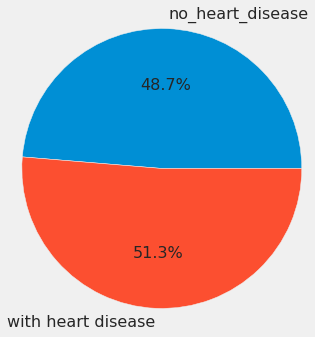

In [ ]:
plt.pie(df_target.values, labels = ["no_heart_disease","with heart disease"], autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

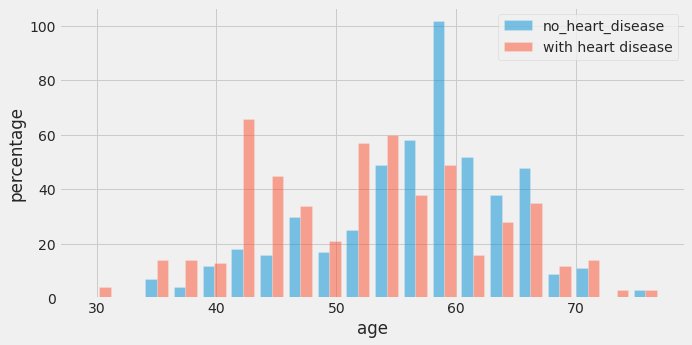

In [ ]:
plt.figure(figsize=(10,5))
plt.hist([df[df.target==0].age, df[df.target==1].age], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend()
plt.show()

The ratio get higher over the age of forty. That is, people who is over forty is under high risk of heart disease.

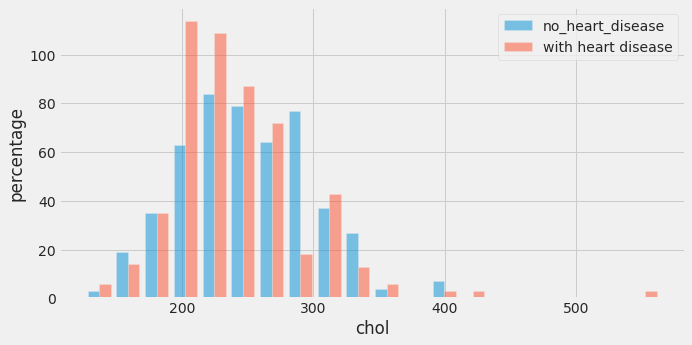

In [ ]:
plt.figure(figsize=(10,5))
plt.hist([df[df.target==0].chol, df[df.target==1].chol], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("chol")
plt.ylabel("percentage")
plt.legend()
plt.show()

Also, amounts of people having heart disease are over 200mg/dl of chol. According to the research, the normal value of chol should be lower than 200mg/dl.

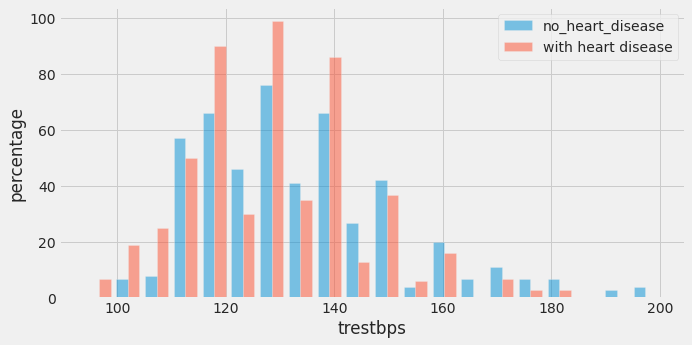

In [ ]:
plt.figure(figsize=(10,5))
plt.hist([df[df.target==0].trestbps, df[df.target==1].trestbps], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("trestbps")
plt.ylabel("percentage")
plt.legend()
plt.show()

The ideal blood pressure should be lower than 120 mmHg. Whether the patients have heart disease or not , over 50% patients have higher blood pressure.

Maximum heart rate is negatively related to the age. Let's see the distribution.

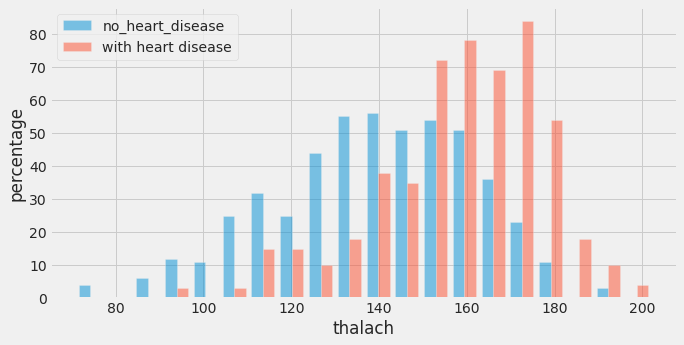

In [ ]:
plt.figure(figsize=(10,5))
plt.hist([df[df.target==0].thalach, df[df.target==1].thalach], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("thalach")
plt.ylabel("percentage")
plt.legend()
plt.show()

Interesting outcome. It seems that the medium of patient with heart disease is higher.

## Heart Disease Frequency according to Sex

In [ ]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [ ]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


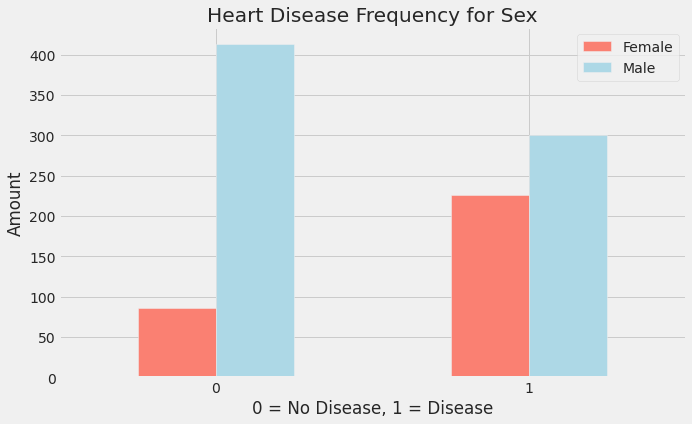

In [ ]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

## Age vs. Max Heart Rate for Heart Disease

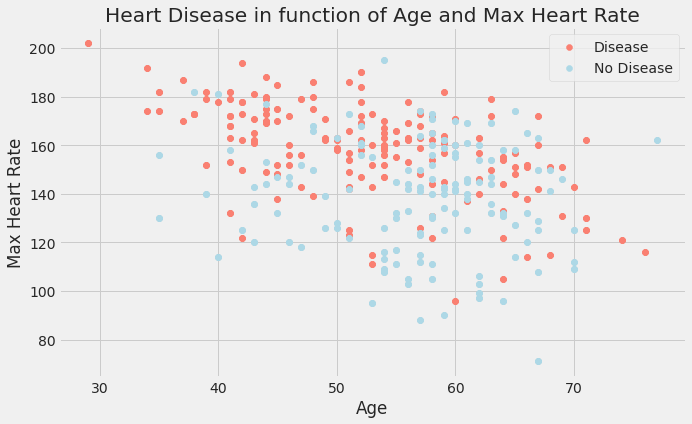

In [ ]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

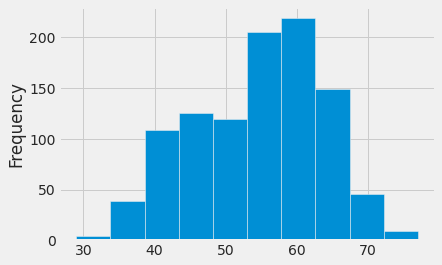

In [ ]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type
1. cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs or disease

In [ ]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


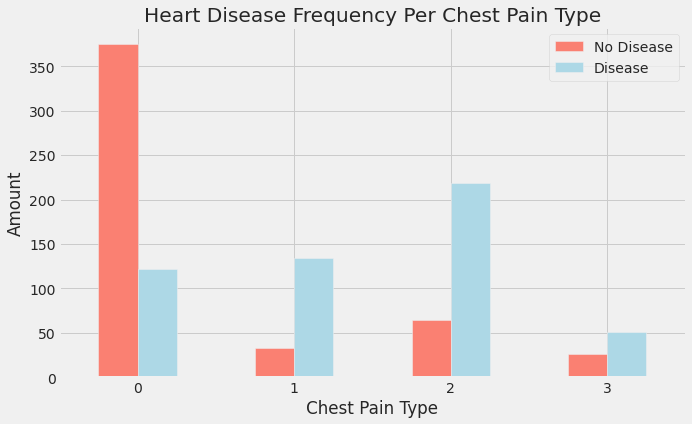

In [ ]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

### 📌 Notes:
> - We have `165` person with heart disease and `138` person without heart disease, so our problem is balanced.
> - Looks like the perfect dataset!!! No null values :-)

In [ ]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [ ]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
have_disease = data.loc[data['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'sex'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Sex.I  :Bars   [index]   (sex)
   .Bars.Sex.II :Bars   [index]   (sex)

In [ ]:
have_disease = data.loc[data['target']==1, 'cp'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'cp'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Chest Pain Type", xlabel='Chest Pain Type', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Cp.I  :Bars   [index]   (cp)
   .Bars.Cp.II :Bars   [index]   (cp)

In [ ]:
have_disease = data.loc[data['target']==1, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by fasting blood sugar", xlabel='fasting blood sugar > 120 mg/dl (1 = true; 0 = false)', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Fbs.I  :Bars   [index]   (fbs)
   .Bars.Fbs.II :Bars   [index]   (fbs)

In [ ]:
have_disease = data.loc[data['target']==1, 'restecg'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'restecg'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by resting electrocardiographic results", xlabel='resting electrocardiographic results', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Restecg.I  :Bars   [index]   (restecg)
   .Bars.Restecg.II :Bars   [index]   (restecg)

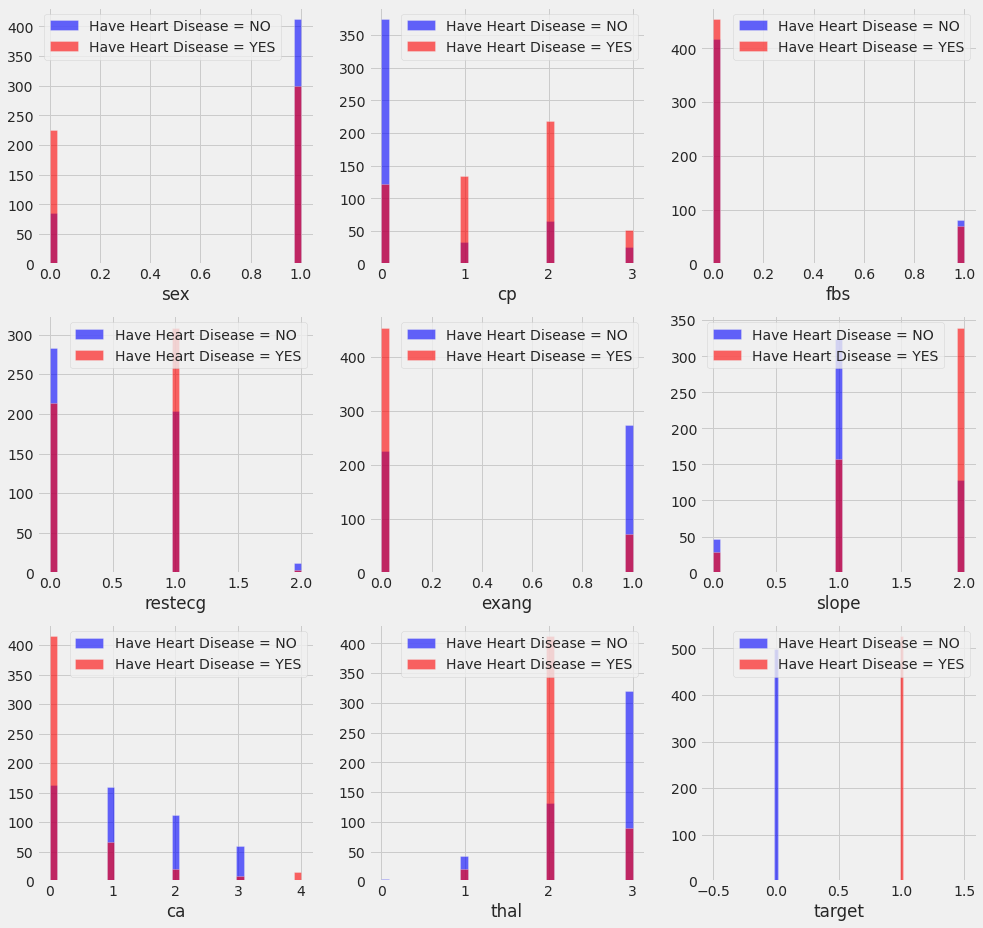

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

### 📌 Notes:

> - `cp` {Chest Pain} : People with cp equl to 1, 2, 3 are more likely to have heart disease than people with cp equal to 0.
> - `restecg` {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.
> - `exang` {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)
> - `slope` {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).
> - `ca` {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.
> - `thal` {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease.

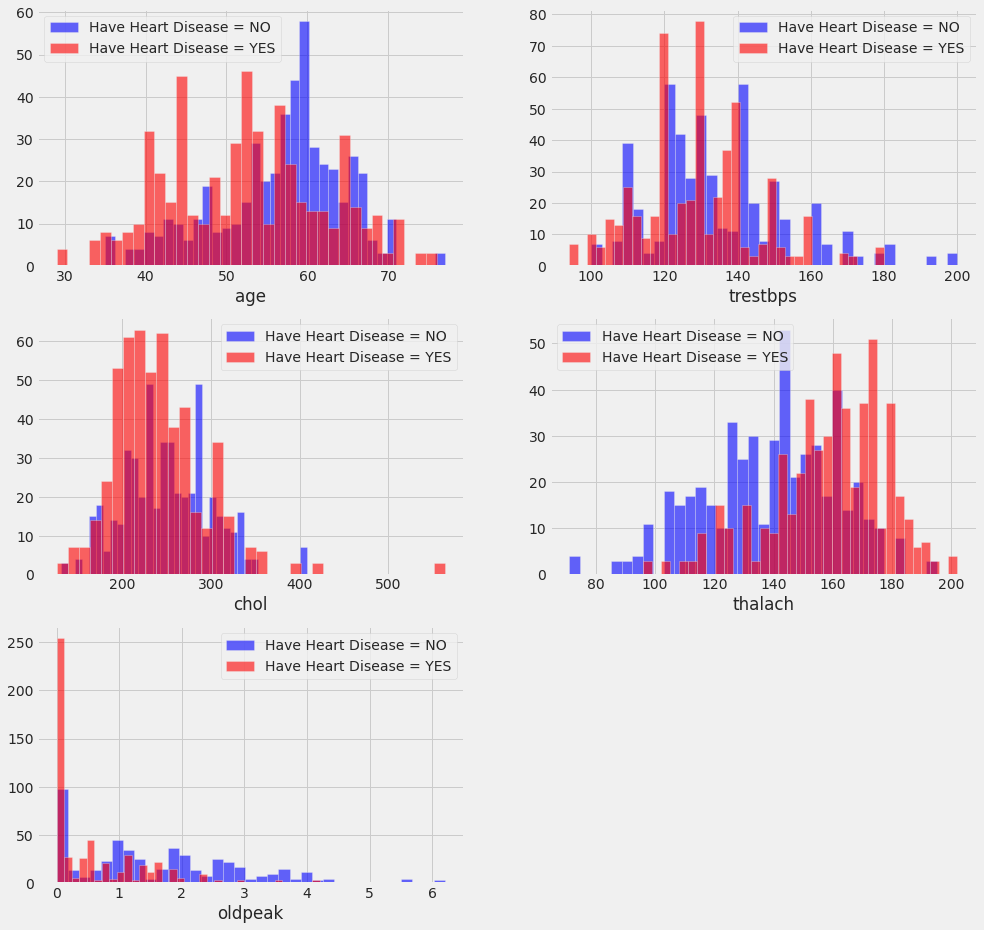

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

### Notes:
> - `trestbps` : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
> - `chol` {serum cholestoral in mg/dl} : above 200 is cause for concern.
> - `thalach` {maximum heart rate achieved} : People how acheived a maximum more than 140 are more likely to have heart disease.
> - `oldpeak` ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

### Age vs. Max Heart Rate for Heart Disease

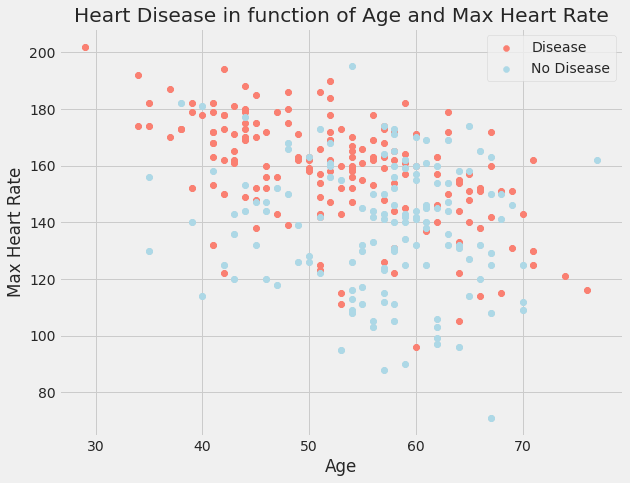

In [ ]:
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

# 🧮 Correlation Matrix

(14.5, -0.5)

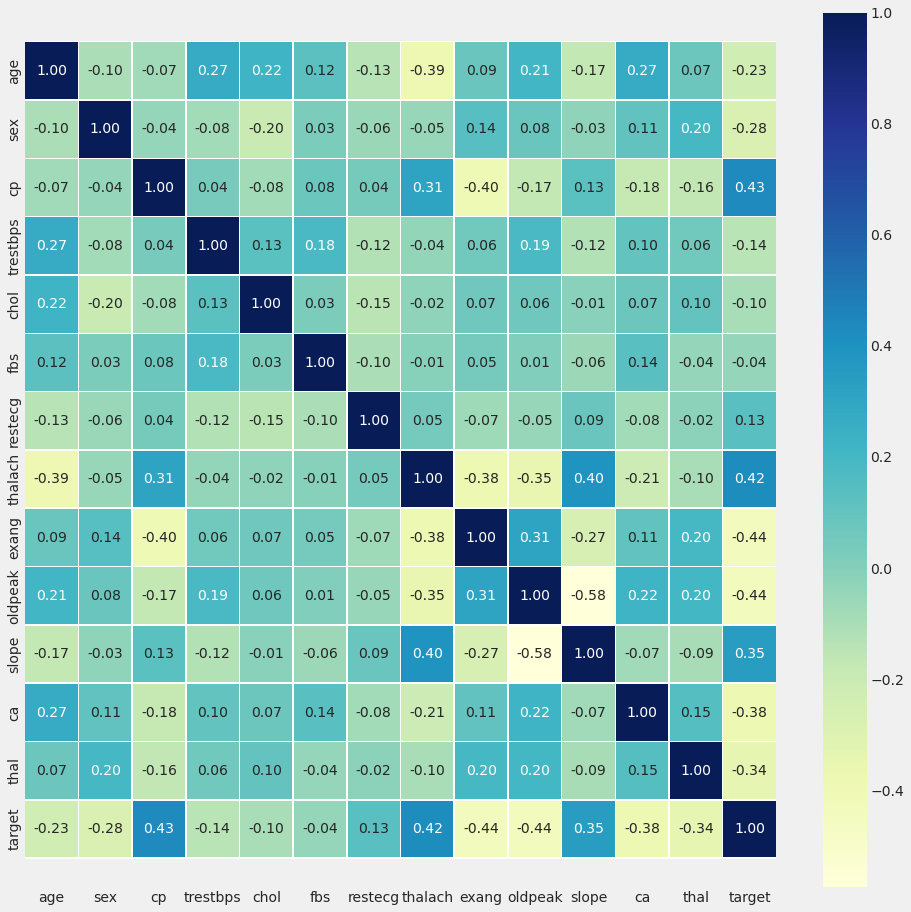

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
data.drop('target', axis=1).corrwith(data.target).hvplot.barh(
    width=600, height=400, 
    title="Correlation between Heart Disease and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

- `fbs` and `chol` are the lowest correlated with the target variable.
- All other variables have a significant correlation with the target variable.

# 🔄 Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [ ]:
categorical_val.remove('target')
dataset = pd.get_dummies(data, columns = categorical_val)

In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.00,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.10,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.60,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.00,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.90,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
print(data.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.27,-0.38,-0.66,0.82,-0.06,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.16,0.48,-0.83,0.26,1.73,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.72,0.76,-1.40,-1.05,1.30,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.72,0.94,-0.83,0.52,-0.91,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.83,0.36,0.93,-1.87,0.71,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


# 🤖 Models Building

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
> 1. Logistic Regression 
> 2. K-Nearest Neighbours Classifier
> 3. Support Vector machine
> 4. Decision Tree Classifier
> 5. Random Forest Classifier
> 6. XGBoost Classifier

## 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.54%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.91   0.89      0.90       0.90          0.90
recall      0.87   0.92      0.90       0.89          0.90
f1-score    0.89   0.90      0.90       0.89          0.90
support   340.00 377.00      0.90     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[295  45]
 [ 30 347]]

Test Result:
Accuracy Score: 81.82%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.85   0.79      0.82       0.82          0.82
recall      0.79   0.85      0.82       0.82          0.82
f1-score    0.82   0.82      0.82       0.82          0.82
support   159.00 149.00      0.82     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[125  34]
 [ 22 127]]



In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.54,81.82


## 2. K-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.77%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.91   0.92      0.92       0.92          0.92
recall      0.91   0.92      0.92       0.92          0.92
f1-score    0.91   0.92      0.92       0.92          0.92
support   340.00 377.00      0.92     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[310  30]
 [ 29 348]]

Test Result:
Accuracy Score: 81.82%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.86   0.78      0.82       0.82          0.82
recall      0.77   0.87      0.82       0.82          0.82
f1-score    0.81   0.82      0.82       0.82          0.82
support   159.00 149.00      0.82     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[123  36]
 [ 20 129]]



In [ ]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.54,81.82
1,K-nearest neighbors,91.77,81.82


## 3. Support Vector machine

In [ ]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.40%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.97   0.94      0.95       0.96          0.95
recall      0.93   0.97      0.95       0.95          0.95
f1-score    0.95   0.96      0.95       0.95          0.95
support   340.00 377.00      0.95     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[317  23]
 [ 10 367]]

Test Result:
Accuracy Score: 90.26%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.94   0.87      0.90       0.90          0.91
recall      0.86   0.95      0.90       0.90          0.90
f1-score    0.90   0.90      0.90       0.90          0.90
support   159.00 149.00      0.90     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[137  22]
 [  8 141]]



In [ ]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.54,81.82
1,K-nearest neighbors,91.77,81.82
2,Support Vector Machine,95.40,90.26


## 4. Decision Tree Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 97.08%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.95   1.00      0.97       0.97          0.97
recall      1.00   0.94      0.97       0.97          0.97
f1-score    0.97   0.97      0.97       0.97          0.97
support   159.00 149.00      0.97     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[159   0]
 [  9 140]]



In [ ]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.54,81.82
1,K-nearest neighbors,91.77,81.82
2,Support Vector Machine,95.40,90.26
3,Decision Tree Classifier,100.00,97.08


## 5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 98.05%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.96   1.00      0.98       0.98          0.98
recall      1.00   0.96      0.98       0.98          0.98
f1-score    0.98   0.98      0.98       0.98          0.98
support   159.00 149.00      0.98     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[159   0]
 [  6 143]]



In [ ]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.54,81.82
1,K-nearest neighbors,91.77,81.82
2,Support Vector Machine,95.40,90.26
3,Decision Tree Classifier,100.00,97.08
4,Random Forest Classifier,100.00,98.05


## 6. XGBoost Classifer

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.33%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.99   0.98      0.98       0.98          0.98
recall      0.98   0.99      0.98       0.98          0.98
f1-score    0.98   0.98      0.98       0.98          0.98
support   340.00 377.00      0.98     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[332   8]
 [  4 373]]

Test Result:
Accuracy Score: 96.10%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.97   0.95      0.96       0.96          0.96
recall      0.96   0.97      0.96       0.96          0.96
f1-score    0.96   0.96      0.96       0.96          0.96
support   159.00 149.00      0.96     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[152   7]
 [  5 144]]



In [ ]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.54,81.82
1,K-nearest neighbors,91.77,81.82
2,Support Vector Machine,95.40,90.26
3,Decision Tree Classifier,100.00,97.08
4,Random Forest Classifier,100.00,98.05
5,XGBoost Classifier,98.33,96.10


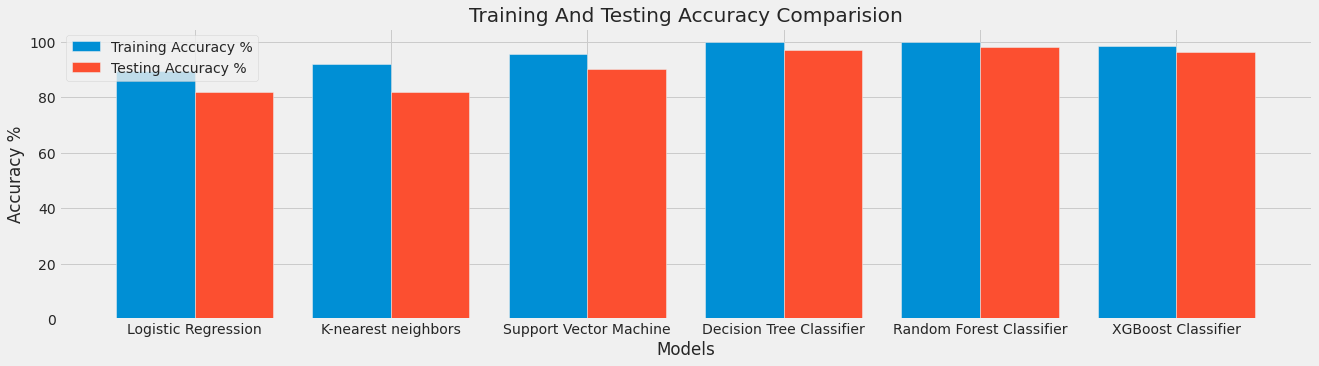

In [ ]:
list0 = list(results_df.iloc[:, 0])
list1 = list(results_df.iloc[:, 1])
list2 = list(results_df.iloc[:, 2])
X_axis = np.arange(len(list0))
#print("0:",list0)
#print("1:",list1)
#print("2:",list2)
plt.figure(figsize=(20,5))
#colors = rainbow(np.linspace(0, 1, len(tuning_results_df['Testing Accuracy %'])))
plt.bar(X_axis - 0.2, list1, 0.4, label = 'Training Accuracy %')
plt.bar(X_axis + 0.2, list2, 0.4, label = 'Testing Accuracy %')

plt.xticks(X_axis, list0)
plt.xlabel("Models")
plt.ylabel("Accuracy %")
plt.title("Training And Testing Accuracy Comparision")
plt.legend()
plt.show()

# Models Hyperparameter Tuning

## 1. Logistic Regression Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.08858667904100823, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 88.84%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.89   0.89      0.89       0.89          0.89
recall      0.87   0.90      0.89       0.89          0.89
f1-score    0.88   0.90      0.89       0.89          0.89
support   340.00 377.00      0.89     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[296  44]
 [ 36 341]]

Test Result:
Accuracy Score: 82.14%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.86   0.79      0.82       0.82          0.83
recall      0.78   0.87      0.82       0.82          0.82
f1-score    0.82   0.82      0.82       0.82          0.82
support   159.00 149.00      0.82

In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,88.84,82.14


In [ ]:
print("-----BEFORE PARAMETER TUNING-----")
print(results_df.iloc[0:1])
print("\n-----AFTER PARAMETER TUNING-----")
print(tuning_results_df[0:1])

-----BEFORE PARAMETER TUNING-----
                 Model  Training Accuracy %  Testing Accuracy %
0  Logistic Regression                89.54               81.82

-----AFTER PARAMETER TUNING-----
                       Model  Training Accuracy %  Testing Accuracy %
0  Tuned Logistic Regression                88.84               82.14


## 2. K-nearest neighbors Hyperparameter Tuning

In [ ]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 100.00%


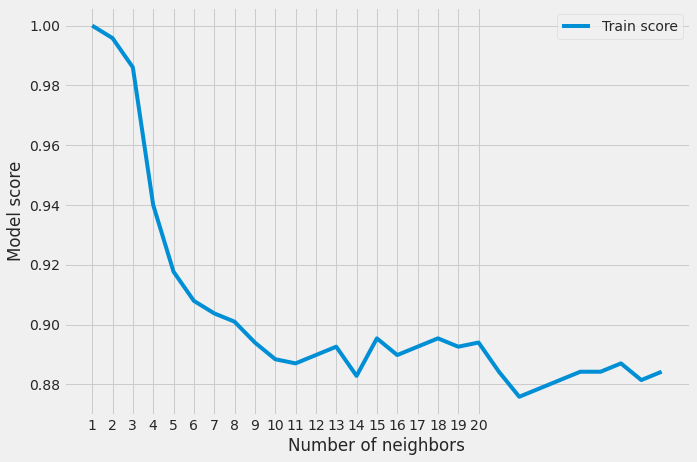

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.70%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.90   0.88      0.89       0.89          0.89
recall      0.86   0.92      0.89       0.89          0.89
f1-score    0.88   0.89      0.89       0.89          0.89
support   340.00 377.00      0.89     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[291  49]
 [ 32 345]]

Test Result:
Accuracy Score: 83.44%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.90   0.78      0.83       0.84          0.84
recall      0.77   0.91      0.83       0.84          0.83
f1-score    0.83   0.84      0.83       0.83          0.83
support   159.00 149.00      0.83     308.00        308.00
_______________________________________________
Confusion Matrix: 
 [[122  37]
 [ 14 135]]



In [ ]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,88.84,82.14
1,Tuned K-nearest neighbors,88.70,83.44


In [ ]:
print("-----BEFORE PARAMETER TUNING-----")
print(results_df.iloc[0:2])
print("\n-----AFTER PARAMETER TUNING-----")
print(tuning_results_df[0:2])

-----BEFORE PARAMETER TUNING-----
                 Model  Training Accuracy %  Testing Accuracy %
0  Logistic Regression                89.54               81.82
1  K-nearest neighbors                91.77               81.82

-----AFTER PARAMETER TUNING-----
                       Model  Training Accuracy %  Testing Accuracy %
0  Tuned Logistic Regression                88.84               82.14
1  Tuned K-nearest neighbors                88.70               83.44


## 3. Support Vector Machine Hyperparameter Tuning

In [ ]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

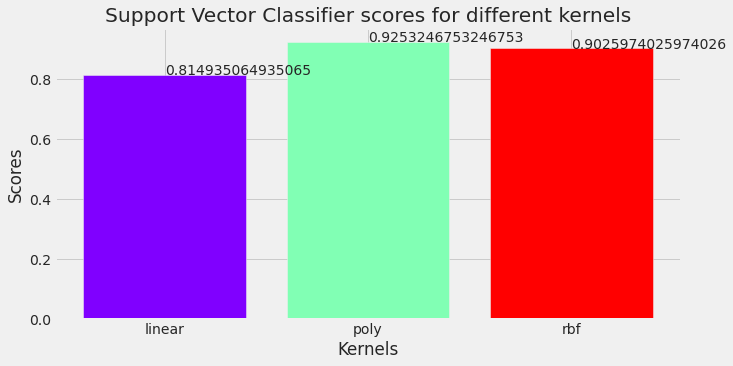

In [ ]:
plt.figure(figsize=(10,5))
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [ ]:
svm_clf = SVC(kernel='poly', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20), 
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best params: {'C': 2, 'gamma': 0.5, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 98.05%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.96   1.00      0.98       0.98          0.98
recall      1.00   0.96      0.98       0.98          0.98
f1-score    0.98   0.98      0.98       0.98          0.98
support   159.00 149.00      0.98     308.00 

In [ ]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,88.84,82.14
1,Tuned K-nearest neighbors,88.70,83.44
2,Tuned Support Vector Machine,100.00,98.05


In [ ]:
print("-----BEFORE PARAMETER TUNING-----")
print(results_df.iloc[0:3])
print("\n-----AFTER PARAMETER TUNING-----")
print(tuning_results_df[0:3])

-----BEFORE PARAMETER TUNING-----
                    Model  Training Accuracy %  Testing Accuracy %
0     Logistic Regression                89.54               81.82
1     K-nearest neighbors                91.77               81.82
2  Support Vector Machine                95.40               90.26

-----AFTER PARAMETER TUNING-----
                          Model  Training Accuracy %  Testing Accuracy %
0     Tuned Logistic Regression                88.84               82.14
1     Tuned K-nearest neighbors                88.70               83.44
2  Tuned Support Vector Machine               100.00               98.05


## 4. Decision Tree Classifier Hyperparameter Tuning

In [ ]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best_params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 98.05%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.96   1.00      0.98       0.98          0.98
recall      1.00   0.96      0.98       0.98          0.98
f1-score    0.98   0.98      0.98

In [ ]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,88.84,82.14
1,Tuned K-nearest neighbors,88.70,83.44
2,Tuned Support Vector Machine,100.00,98.05
3,Tuned Decision Tree Classifier,100.00,98.05


In [ ]:
print("-----BEFORE PARAMETER TUNING-----")
print(results_df.iloc[0:3])
print("\n-----AFTER PARAMETER TUNING-----")
print(tuning_results_df[0:3])

-----BEFORE PARAMETER TUNING-----
                    Model  Training Accuracy %  Testing Accuracy %
0     Logistic Regression                89.54               81.82
1     K-nearest neighbors                91.77               81.82
2  Support Vector Machine                95.40               90.26

-----AFTER PARAMETER TUNING-----
                          Model  Training Accuracy %  Testing Accuracy %
0     Tuned Logistic Regression                88.84               82.14
1     Tuned K-nearest neighbors                88.70               83.44
2  Tuned Support Vector Machine               100.00               98.05


## 5. Random Forest Classifier Hyperparameter Tuning

In [ ]:
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 900}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 98.05%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.96   1.00      0.98       0.98          0.98
recall      1.00   0.96      0.98       0.98          0.98
f1-score    0.98   0.98      

In [ ]:
n_estimators = [500, 900, 1100, 1500]
#max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 900}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 98.05%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.96   1.00      0.98       0.98          0.98
recall      1.00   0.96      0.98       0.98          0.98
f1-score    0.98   0.98      

In [ ]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,88.84,82.14
1,Tuned K-nearest neighbors,88.70,83.44
2,Tuned Support Vector Machine,100.00,98.05
3,Tuned Decision Tree Classifier,100.00,98.05
4,Tuned Random Forest Classifier,100.00,98.05


In [ ]:
print("-----BEFORE PARAMETER TUNING-----")
print(results_df.iloc[0:4])
print("\n-----AFTER PARAMETER TUNING-----")
print(tuning_results_df[0:4])

-----BEFORE PARAMETER TUNING-----
                      Model  Training Accuracy %  Testing Accuracy %
0       Logistic Regression                89.54               81.82
1       K-nearest neighbors                91.77               81.82
2    Support Vector Machine                95.40               90.26
3  Decision Tree Classifier               100.00               97.08

-----AFTER PARAMETER TUNING-----
                            Model  Training Accuracy %  Testing Accuracy %
0       Tuned Logistic Regression                88.84               82.14
1       Tuned K-nearest neighbors                88.70               83.44
2    Tuned Support Vector Machine               100.00               98.05
3  Tuned Decision Tree Classifier               100.00               98.05


## 6. XGBoost Classifier Hyperparameter Tuning

In [ ]:
param_grid = dict(
    n_estimators=stats.randint(10, 1000),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0, 1)
)

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_cv = RandomizedSearchCV(
    xgb_clf, param_grid, cv=3, n_iter=50, 
    scoring='accuracy', n_jobs=-1, verbose=1
)
xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best paramters: {'learning_rate': 0.7737700555321056, 'max_depth': 6, 'n_estimators': 40}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   340.00 377.00      1.00     717.00        717.00
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 99.03%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.98   1.00      0.99       0.99          0.99
recall      1.00   0.98      0.99       0.99          0.99
f1-score    0.99   0.99      0.99       0.99          0.99
support  

In [ ]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,88.84,82.14
1,Tuned K-nearest neighbors,88.70,83.44
2,Tuned Support Vector Machine,100.00,98.05
3,Tuned Decision Tree Classifier,100.00,98.05
4,Tuned Random Forest Classifier,100.00,98.05
5,Tuned XGBoost Classifier,100.00,99.03


In [ ]:
print("-----BEFORE PARAMETER TUNING-----")
print(results_df.iloc[0:5])
print("\n-----AFTER PARAMETER TUNING-----")
print(tuning_results_df[0:5])

-----BEFORE PARAMETER TUNING-----
                      Model  Training Accuracy %  Testing Accuracy %
0       Logistic Regression                89.54               81.82
1       K-nearest neighbors                91.77               81.82
2    Support Vector Machine                95.40               90.26
3  Decision Tree Classifier               100.00               97.08
4  Random Forest Classifier               100.00               98.05

-----AFTER PARAMETER TUNING-----
                            Model  Training Accuracy %  Testing Accuracy %
0       Tuned Logistic Regression                88.84               82.14
1       Tuned K-nearest neighbors                88.70               83.44
2    Tuned Support Vector Machine               100.00               98.05
3  Tuned Decision Tree Classifier               100.00               98.05
4  Tuned Random Forest Classifier               100.00               98.05


In [ ]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.54,81.82
1,K-nearest neighbors,91.77,81.82
2,Support Vector Machine,95.40,90.26
3,Decision Tree Classifier,100.00,97.08
4,Random Forest Classifier,100.00,98.05
5,XGBoost Classifier,98.33,96.10


In [ ]:
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,88.84,82.14
1,Tuned K-nearest neighbors,88.70,83.44
2,Tuned Support Vector Machine,100.00,98.05
3,Tuned Decision Tree Classifier,100.00,98.05
4,Tuned Random Forest Classifier,100.00,98.05
5,Tuned XGBoost Classifier,100.00,99.03


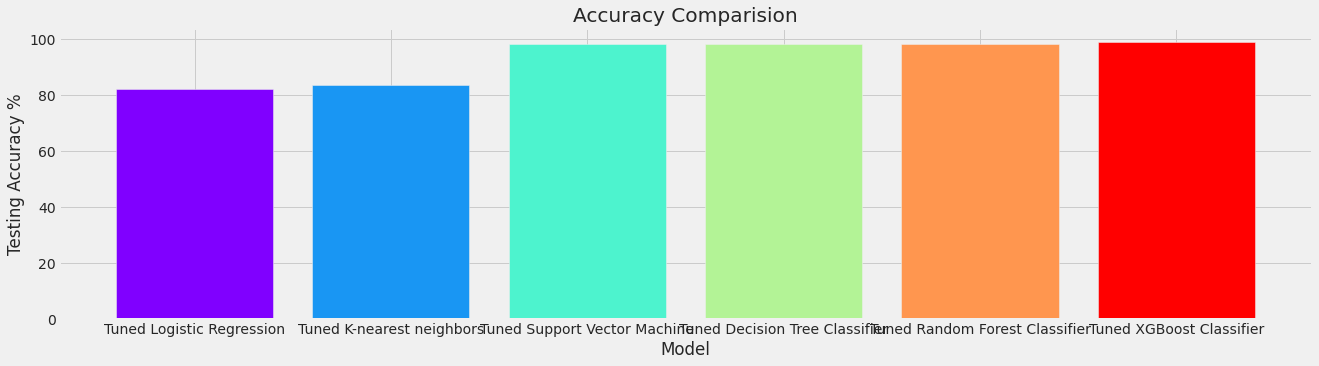

In [ ]:
plt.figure(figsize=(20,5))
X1 = list(tuning_results_df.iloc[:, 0])
Y1 = list(tuning_results_df.iloc[:, 2])
colors = rainbow(np.linspace(0, 1, len(tuning_results_df['Testing Accuracy %'])))
# Plot the data using bar() method
plt.bar(X1, Y1, color=colors)
plt.title("Accuracy Comparision")
plt.ylabel("Testing Accuracy %")
plt.xlabel("Model")
  
# Show the plot
plt.show()

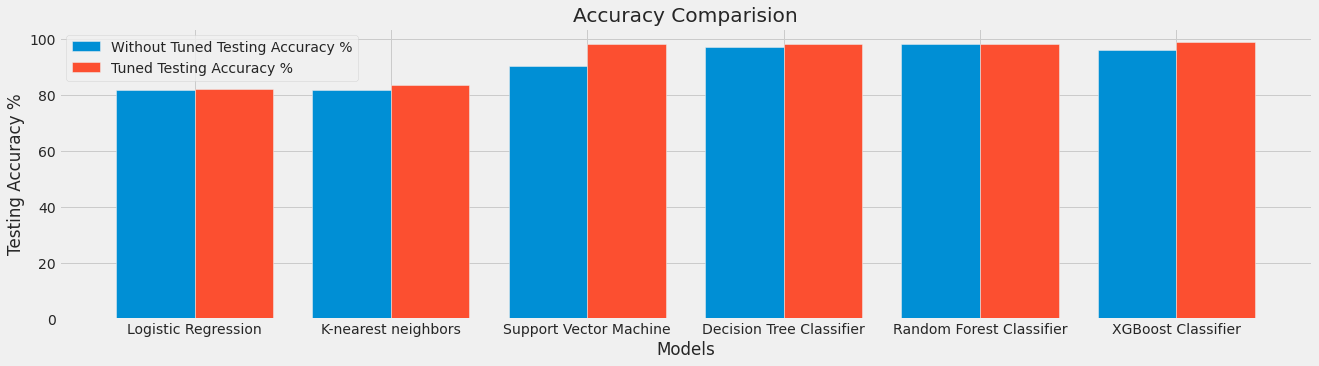

In [ ]:
list0 = list(results_df.iloc[:, 0])
list1 = list(results_df.iloc[:, 2])
list2 = list(tuning_results_df.iloc[:, 2])
X_axis = np.arange(len(list0))
#print("0:",list0)
#print("1:",list1)
#print("2:",list2)
plt.figure(figsize=(20,5))
#colors = rainbow(np.linspace(0, 1, len(tuning_results_df['Testing Accuracy %'])))
plt.bar(X_axis - 0.2, list1, 0.4, label = 'Without Tuned Testing Accuracy %')
plt.bar(X_axis + 0.2, list2, 0.4, label = 'Tuned Testing Accuracy %')

plt.xticks(X_axis, list0)
plt.xlabel("Models")
plt.ylabel("Testing Accuracy %")
plt.title("Accuracy Comparision")
plt.legend()
plt.show()